# **Sales Prediction for Walmart in Mexico**
____

Author: **Daniel Eduardo López**

<font size="-1"><a href="https://www.linkedin.com/in/daniel-eduardo-lopez">LinkedIn</a> | <a href="https://github.com/DanielEduardoLopez">GitHub </a></font>

**28 March 2024**

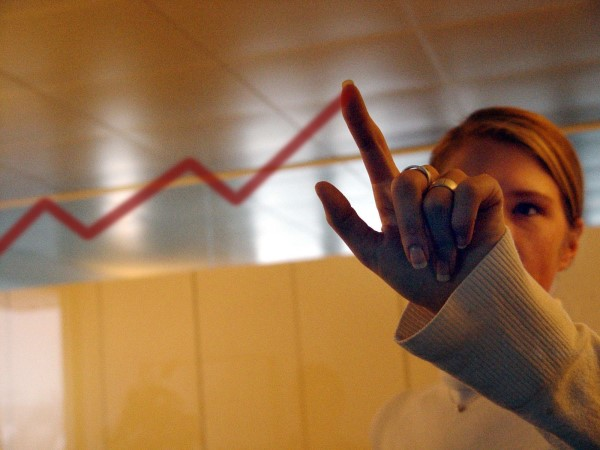


<font size="-1">Image Credit: <a href="https://www.freeimages.com/es/photo/sales-figures-1473495">wagg66</a> from <a href="https://www.freeimages.com">FreeImages</a></font>.

___
## **Table of Contents**
___

1. [**Introduction**](#intro)<br>
    1.1. [Background](#background)<br>
    1.2. [General Objective](#objective)<br>
    1.3. [Research Question](#question)<br>
    1.4. [Hypothesis](#hypothesis)<br>
    1.5. [Abridged Methodology](#methodology)<br>
    1.6. [Notebook's Goal](#goal)<br>
2. [**Data Collection**](#collection)<br>
3. [**Data Exploration**](#exploration)<br>
    3.1 [Data Description](#description)<br>
    3.2 [Data Quality](#quality)<br>
    3.3 [Initial Data Analysis](#ida)<br>    
4. [**Data Preparation**](#preparation)<br>
5. [**Exploratory Data Analysis**](#eda)<br>
6. [**Data Modeling**](#modeling)<br>
7. [**Evaluation**](#modeling)<br>
8. [**Conclusions**](#conclusions)<br>
9. [**References**](#references)<br>


<a class="anchor" id="intro"></a>
___
## **1. Introduction**
___


### **1.1 Background** <a class="anchor" id="intro"></a>

In the ever-changing world of today, it is of the utmost importance to be able to quantify the impact of the external economic indicators in the performance of an organization.

In the context of Mexico, it is possible to collect public data from different government offices such as INEGI or BANXICO, or from international sources such as the S&P500, and to assess how they correlate to the monthly revenue.

Walmart of Mexico (or WALMEX) is one of the most important retail companies within the region, with 3,903 stores in Mexico and Central America, an equity of 199,086,037 MXN, and a yearly revenue of 880,121,761 MXN, according to the figures from December 2023; and, as of February 2024, the goal of WALMEX is to double its sales in a period of 10 years [(Wal-Mart de México S.A.B. de C.V., 2024)](#walmex).

In this sense, the purpose of the present proyect is to predict several economic indicators over the next few years and, then, use them to predict whether Walmart of Mexico will be able to achieve its goal.

### **1.2 General Objective** <a class="anchor" id="objective"></a>

To predict whether Walmart of Mexico will double its sales within the next ten years.

### **1.3 Research question** <a class="anchor" id="question"></a>

Will Walmart of Mexico be able to double its sales within the next ten years? If so, when?

### **1.4 Hypothesis** <a class="anchor" id="hypothesis"></a>

Walmart de México will manage to double its sales within the next ten years.

### **1.5 Methodology** <a class="anchor" id="methodology"></a>

The methodology of the present study is based on Rollin’s *Foundational Methodology for Data Science* [(Rollins, 2015)](#rollins):

1. **Analytical approach**: Building and evaluation of **multivariate time series** and **a regression models**.
2. **Data requirements**: Data about WALMEX's net sales, WALMEX stock value, IPC index, SP&500 index, MXN/USD exchange rate, bonds interest rate (CETES28), money market representative interest rates (28 day TIIE), inflation, and gross domestic product (GDP) of Mexico.
3. **Data collection**: Data from a period of the last 10 years (from 01 Feb 2014 to 01 Feb 2024) was collected from <a href="https://finance.yahoo.com/">Yahoo Finance</a>, <a href="https://www.walmex.mx/en/financial-information/annual.html">Walmex's investors website</a>, <a href="https://www.inegi.org.mx/">INEGI</a>, and <a href="https://www.banxico.org.mx/">Banxico</a>.
4. **Data exploration**: Data was explored with Python 3 and its libraries Numpy, Pandas, Matplotlib and Seaborn.
5. **Data preparation**: Data was cleaned and prepared with Python 3 and its libraries Numpy and Pandas.
6. **Data modeling**: Firstly, the dataset was split in training, validation and testing sets. Then, a **RNN** was created and trained in Python 3 and its libraries Keras and Tensorflow to predict the values of the selected macroeconomic indicators as a multivariate time series. After that, a **regression model** was built using Tensorflow and Keras to predict WALMEX total sales based on the predictions of the selected macroeconomic indicators. ReLU was used as the activation function for the output layer and hidden layers. Furthermore, the mean square error (MSE) loss function and the Adam optimizer were used for the model compilation. Several architectures for the time series and regression model were tested.
7. **Evaluation**: The comparison among predicted and actual sales were primarily evaluated through the Root Mean Squared Error (RMSE), the Mean Absolute Error (MAE), and Coefficient of Determination $(r^{2})$.
8. **Implementation**: An app was built and deployed with Streamlit and Plotly.

### **1.6 Notebook's Goal** <a class="anchor" id="goal"></a>

In this context, the purpose of the present notebook is to collect, explore, prepare, model and evaluate the data from the different sources.


In [2]:
# Loading Requirements Text File
# %pip install -r requirements.txt

In [3]:
# Libraries installation
# %pip install ipykernel
# %pip install numpy
# %pip install pandas
# %pip install yfinance
# %pip install openpyxl
# %pip install matplotlib
# %pip install seaborn

In [4]:
# Libraries importation
import numpy as np
import pandas as pd
import yfinance as yf
import json
from urllib.request import urlopen 
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib_inline.backend_inline
import seaborn as sns
import warnings

In [5]:
# Setting theme and plot resolution
sns.set_theme(context = 'notebook', style = 'darkgrid')
mpl.rcParams["figure.dpi"] = 100
mpl.rcParams["savefig.dpi"] = 300
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# Setting default plot's aesthetics
plotfontcolor = 'dimgray'
mpl.rcParams['text.color'] = plotfontcolor
mpl.rcParams['axes.labelcolor'] = plotfontcolor
mpl.rcParams['xtick.color'] = plotfontcolor
mpl.rcParams['ytick.color'] = plotfontcolor
mpl.rcParams["font.size"] = 10
mpl.rcParams['axes.titlesize'] = 14
mpl.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 11
mpl.rcParams["axes.labelweight"] = "bold"
mpl.rcParams["axes.titleweight"] = "bold"
#mpl.rcParams['font.family'] = 'sans-serif'
#mpl.rcParams['font.family'] = 'serif'

# Disabling warnings
warnings.filterwarnings('ignore')

<a class="anchor" id="collection"></a>
___
## **2. Data Collection**
___


First, the stock close values of WALMEX, and the index values from the IPC and the S&P500 were retrieved from the API of *Yahoo! Finance* through the library **yfinance**.

In [6]:
# Retrieving market data for WALMEX, IPC and S&P500
stocks = ["WALMEX.MX", "^MXX", "^GSPC"]
stocks_df = yf.download(stocks, start="2014-02-01", end="2024-02-01")['Close']
stocks_df.head()

[*********************100%%**********************]  3 of 3 completed


Ticker,WALMEX.MX,^GSPC,^MXX
Date,,,
2014-02-03,NaN,1741.890015,NaN
2014-02-04,31.500000,1755.199951,40085.519531
2014-02-05,31.379999,1751.640015,39880.871094
2014-02-06,31.190001,1773.430054,40288.781250
2014-02-07,29.850000,1797.020020,40525.738281


Then, WALMEX sales figures were retrieved from the <a href="https://www.walmex.mx/en/financial-information/annual.html">Walmex's investors website</a>. As the financial data was disclosed in a quaterly basis in 40 PDF files hosted on a variety of inconsistent links, for sake of efficiency, it was decided to collect the data manually and consolidate it in an Excel file. 

The amount of files was sizeable for manual handling, and the complexity of developing a script for scraping and parsing each file was too high to just retrieve the account of *Net sales*. Thus, it was decided to proceed in a manual fashion.

In [7]:
# Loading sales data 
link = 'https://github.com/DanielEduardoLopez/SalesPrediction/raw/main/Walmex_Quarterly_Net_Sales.xlsx'
sales_df = pd.read_excel(link)
sales_df.head()

,Year,Quarter,Net Sales (mdp),Units,Sq.mt. Mexico,Sq.mt. Central America
0,2014,Q1,101405,2867,NaN,NaN
1,2014,Q2,103300,2879,NaN,NaN
2,2014,Q3,104367,2904,NaN,NaN
3,2014,Q4,128586,2983,NaN,NaN
4,2015,Q1,110875,2987,NaN,NaN


Later, the GDP and inflation data were retrieved from <a href='https://www.inegi.org.mx/servicios/api_indicadores.html'>INEGI's Query Constructor</a>, saving the response JSON files into disk, and then loading them into the notebook.

In [8]:
# Loading GDP data
gdp_link = "https://raw.githubusercontent.com/DanielEduardoLopez/SalesPrediction/main/gdp_data.json"

response = urlopen(gdp_link) 

gdp_json = json.loads(response.read())

In [9]:
# Retrieving series
gdp_dict = gdp_json["Series"][0]["OBSERVATIONS"]

In [10]:
# Converting dict into a dataframe
gdp_df = pd.DataFrame.from_dict(gdp_dict, orient='columns')
gdp_df.head()

,TIME_PERIOD,OBS_VALUE,OBS_EXCEPTION,OBS_STATUS,OBS_SOURCE,OBS_NOTE,COBER_GEO
0,2023/04,25596360.563,,1,17,None,00
1,2023/03,25121269.269,,,17,None,00
2,2023/02,25001939.978,,,17,None,00
3,2023/01,24291956.149,,,17,None,00
4,2022/04,24981146.477,,,17,None,00


It is noteworthy that the GDP values are sorted descending according to the time period, which is inconsistent with the other datasets, so, the GDP dataset was sorted ascending.

In [11]:
gdp_df = gdp_df.sort_values(by='TIME_PERIOD', ascending=True).reset_index(drop=True)
gdp_df.head()

,TIME_PERIOD,OBS_VALUE,OBS_EXCEPTION,OBS_STATUS,OBS_SOURCE,OBS_NOTE,COBER_GEO
0,1980/01,10401367.607,,,17,None,00
1,1980/02,10342350,,,17,None,00
2,1980/03,10392733.012,,,17,None,00
3,1980/04,10927666.353,,,17,None,00
4,1981/01,11345848.491,,,17,None,00


Finally, the MXN/USD exchange rates, the bonds interest rates (CETES 28), and the money market representative interest rates (28 day TIIE) data were retrieved from <a href="https://www.banxico.org.mx/">Banxico's website</a> in form of CSV files.

In [12]:
# Loading MXN/USD exchange rates data
exchange_rates_link = 'https://raw.githubusercontent.com/DanielEduardoLopez/SalesPrediction/main/exchange_rates_data.csv'
exchange_rates_df = pd.read_csv(exchange_rates_link, encoding = "ISO-8859-1")
exchange_rates_df.head(15)

,Banco de México,Unnamed: 1
0,NaN,NaN
1,Exchange rates and auctions historical informa...,NaN
2,Tipos de cambio diarios,NaN
3,NaN,NaN
4,Date: 03/02/2024 06:14:08,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,Title,"Exchange rate pesos per US dollar, Used to set..."
9,Information type,Levels


In [13]:
# Loading bonds interest rates data
bonds_rates_link = 'https://raw.githubusercontent.com/DanielEduardoLopez/SalesPrediction/main/bonds_rates_data.csv'
bonds_rates_df = pd.read_csv(bonds_rates_link, encoding = "ISO-8859-1")
bonds_rates_df.head(15)

,Banco de México,Unnamed: 1
0,NaN,NaN
1,Securities auctions and Open Market Operations,NaN
2,Valores Gubernamentales,NaN
3,NaN,NaN
4,Date: 03/02/2024 06:05:53,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,Title,Bonds Issued by Public Agencies Weekly auction...
9,Information type,Levels


In [14]:
# Loading bonds interest rates data
interest_rates_link = 'https://raw.githubusercontent.com/DanielEduardoLopez/SalesPrediction/main/interest_rates_data.csv'
interest_rates_df = pd.read_csv(interest_rates_link, encoding = "ISO-8859-1")
interest_rates_df.head(15)

,Banco de México,Unnamed: 1
0,NaN,NaN
1,Securities prices and interest rates,NaN
2,Tasas de Interés en el Mercado de Dinero,NaN
3,NaN,NaN
4,Date: 03/02/2024 06:10:39,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,Title,"28 day TIIE, Interest rate in annual percent"
9,Information type,Levels


<a class="anchor" id="exploration"></a>
___
## **3. Data Exploration**
___

### **3.1 Data Description** <a class="anchor" id="description"></a>

#### **Stock Dataset**

In [15]:
# Preview of dataset
stocks_df.head()

Ticker,WALMEX.MX,^GSPC,^MXX
Date,,,
2014-02-03,NaN,1741.890015,NaN
2014-02-04,31.500000,1755.199951,40085.519531
2014-02-05,31.379999,1751.640015,39880.871094
2014-02-06,31.190001,1773.430054,40288.781250
2014-02-07,29.850000,1797.020020,40525.738281


In [16]:
stocks_df.tail()

Ticker,WALMEX.MX,^GSPC,^MXX
Date,,,
2024-01-25,69.279999,4894.160156,56160.070312
2024-01-26,70.699997,4890.970215,56855.878906
2024-01-29,70.349998,4927.930176,57175.730469
2024-01-30,71.919998,4924.970215,57537.140625
2024-01-31,71.089996,4845.649902,57372.761719


In [17]:
# Basic info
stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2584 entries, 2014-02-03 to 2024-01-31
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   WALMEX.MX  2515 non-null   float64
 1   ^GSPC      2516 non-null   float64
 2   ^MXX       2514 non-null   float64
dtypes: float64(3)
memory usage: 80.8 KB


In [18]:
# Basic statistical description
stocks_df.describe()

Ticker,WALMEX.MX,^GSPC,^MXX
count,2515.000000,2516.000000,2514.000000
mean,52.796288,3030.773772,46462.182669
std,13.482746,909.474790,4687.222880
min,28.059999,1741.890015,32964.218750
25%,42.039999,2138.630066,43406.756836
50%,52.689999,2810.109985,46047.953125
75%,65.530003,3930.392578,49939.346680
max,81.919998,4927.930176,57745.789062


In [19]:
# Shape of dataset
stocks_df.shape

(2584, 3)

So, the stock dataset comprises 2584 daily observations of the close value of WALMEX.MX, GSPC (S&P 500) and MXX (IPC).

#### **Sales Dataset**

In [20]:
# Preview of the dataset
sales_df.head()

,Year,Quarter,Net Sales (mdp),Units,Sq.mt. Mexico,Sq.mt. Central America
0,2014,Q1,101405,2867,NaN,NaN
1,2014,Q2,103300,2879,NaN,NaN
2,2014,Q3,104367,2904,NaN,NaN
3,2014,Q4,128586,2983,NaN,NaN
4,2015,Q1,110875,2987,NaN,NaN


In [21]:
sales_df.tail()

,Year,Quarter,Net Sales (mdp),Units,Sq.mt. Mexico,Sq.mt. Central America
35,2022,Q4,236272,3745,6655421.0,815407.0
36,2023,Q1,204601,3755,6659477.0,818300.0
37,2023,Q2,212164,3775,6688133.0,818300.0
38,2023,Q3,211436,3802,6706432.0,819264.0
39,2023,Q4,251921,3903,6831809.0,821822.0


In [22]:
# Basic info of the dataset
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    40 non-null     int64  
 1   Quarter                 40 non-null     object 
 2   Net Sales (mdp)         40 non-null     int64  
 3   Units                   40 non-null     int64  
 4   Sq.mt. Mexico           27 non-null     float64
 5   Sq.mt. Central America  27 non-null     float64
dtypes: float64(2), int64(3), object(1)
memory usage: 2.0+ KB


In [23]:
# Basic statistical description
sales_df.describe()

,Year,Net Sales (mdp),Units,Sq.mt. Mexico,Sq.mt. Central America
count,40.000000,40.000000,40.000000,2.700000e+01,27.000000
mean,2018.500000,160831.950000,3311.700000,6.393321e+06,780801.370370
std,2.908872,37308.578943,300.161512,2.190696e+05,39569.845038
min,2014.000000,101405.000000,2867.000000,6.035180e+06,689820.000000
25%,2016.000000,130929.000000,3041.500000,6.203962e+06,753962.000000
50%,2018.500000,160334.500000,3254.000000,6.403496e+06,799486.000000
75%,2021.000000,188321.250000,3545.750000,6.553819e+06,807843.500000
max,2023.000000,251921.000000,3903.000000,6.831809e+06,821822.000000


In [24]:
# Shape of dataset
sales_df.shape

(40, 6)

#### **GDP Dataset**

In [25]:
# Preview of the dataset
gdp_df.head()

,TIME_PERIOD,OBS_VALUE,OBS_EXCEPTION,OBS_STATUS,OBS_SOURCE,OBS_NOTE,COBER_GEO
0,1980/01,10401367.607,,,17,None,00
1,1980/02,10342350,,,17,None,00
2,1980/03,10392733.012,,,17,None,00
3,1980/04,10927666.353,,,17,None,00
4,1981/01,11345848.491,,,17,None,00


In [26]:
gdp_df.tail()

,TIME_PERIOD,OBS_VALUE,OBS_EXCEPTION,OBS_STATUS,OBS_SOURCE,OBS_NOTE,COBER_GEO
171,2022/04,24981146.477,,,17,None,00
172,2023/01,24291956.149,,,17,None,00
173,2023/02,25001939.978,,,17,None,00
174,2023/03,25121269.269,,,17,None,00
175,2023/04,25596360.563,,1,17,None,00


In [27]:
# Basic info of the dataset
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TIME_PERIOD    176 non-null    object
 1   OBS_VALUE      176 non-null    object
 2   OBS_EXCEPTION  176 non-null    object
 3   OBS_STATUS     176 non-null    object
 4   OBS_SOURCE     176 non-null    object
 5   OBS_NOTE       0 non-null      object
 6   COBER_GEO      176 non-null    object
dtypes: object(7)
memory usage: 9.8+ KB


In [28]:
# Basic statistical description
gdp_df.describe()

,TIME_PERIOD,OBS_VALUE,OBS_EXCEPTION,OBS_STATUS,OBS_SOURCE,OBS_NOTE,COBER_GEO
count,176,176,176,176,176,0,176
unique,176,176,1,3,1,0,1
top,1980/01,10401367.607,,,17,NaN,00
freq,1,1,176,174,176,NaN,176


In [29]:
# Shape of dataset
gdp_df.shape

(176, 7)

#### **Exchange Rates Dataset**

In [30]:
# Preview of the dataset
exchange_rates_df.head(10)

,Banco de México,Unnamed: 1
0,NaN,NaN
1,Exchange rates and auctions historical informa...,NaN
2,Tipos de cambio diarios,NaN
3,NaN,NaN
4,Date: 03/02/2024 06:14:08,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,Title,"Exchange rate pesos per US dollar, Used to set..."
9,Information type,Levels


In [31]:
# Preview of the dataset
exchange_rates_df.tail()

,Banco de México,Unnamed: 1
3723,03/01/2024,17.0962
3724,03/02/2024,17.0633
3725,03/03/2024,17.0633
3726,03/04/2024,17.0633
3727,03/05/2024,17.0217


In [32]:
# Basic info of the dataset
exchange_rates_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3728 entries, 0 to 3727
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Banco de México  3723 non-null   object
 1   Unnamed: 1       3720 non-null   object
dtypes: object(2)
memory usage: 58.4+ KB


In [33]:
# Basic statistical description
exchange_rates_df.describe()

,Banco de México,Unnamed: 1
count,3723,3720
unique,3723,2494
top,Exchange rates and auctions historical informa...,20.1175
freq,1,7


In [34]:
# Shape of dataset
exchange_rates_df.shape

(3728, 2)

#### **Bonds Interest Rates Dataset**

In [35]:
# Preview of the dataset
bonds_rates_df.head(10)

,Banco de México,Unnamed: 1
0,NaN,NaN
1,Securities auctions and Open Market Operations,NaN
2,Valores Gubernamentales,NaN
3,NaN,NaN
4,Date: 03/02/2024 06:05:53,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,Title,Bonds Issued by Public Agencies Weekly auction...
9,Information type,Levels


In [36]:
bonds_rates_df.tail()

,Banco de México,Unnamed: 1
537,02/01/2024,11.15
538,02/08/2024,11.06
539,02/15/2024,11.05
540,02/22/2024,11
541,02/29/2024,11


In [37]:
# Basic info of the dataset
bonds_rates_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542 entries, 0 to 541
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Banco de México  537 non-null    object
 1   Unnamed: 1       534 non-null    object
dtypes: object(2)
memory usage: 8.6+ KB


In [38]:
bonds_rates_df.describe()

,Banco de México,Unnamed: 1
count,537,534
unique,537,301
top,Securities auctions and Open Market Operations,3.05
freq,1,7


In [39]:
# Shape of dataset
bonds_rates_df.shape

(542, 2)

#### **Money Market Interest Rates Dataset**

In [40]:
# Preview of the dataset
interest_rates_df.head(10)

,Banco de México,Unnamed: 1
0,NaN,NaN
1,Securities prices and interest rates,NaN
2,Tasas de Interés en el Mercado de Dinero,NaN
3,NaN,NaN
4,Date: 03/02/2024 06:10:39,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,Title,"28 day TIIE, Interest rate in annual percent"
9,Information type,Levels


In [41]:
interest_rates_df.tail()

,Banco de México,Unnamed: 1
2565,02/27/2024,11.4891
2566,02/28/2024,11.49
2567,02/29/2024,11.4875
2568,03/01/2024,11.4937
2569,03/04/2024,11.485


In [42]:
# Basic info of the dataset
interest_rates_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2570 entries, 0 to 2569
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Banco de México  2565 non-null   object
 1   Unnamed: 1       2562 non-null   object
dtypes: object(2)
memory usage: 40.3+ KB


In [43]:
interest_rates_df.describe()

,Banco de México,Unnamed: 1
count,2565,2562
unique,2565,1730
top,Securities prices and interest rates,3.3
freq,1,31


In [44]:
# Shape of dataset
interest_rates_df.shape

(2570, 2)

### **3.2 Data Quality** <a class="anchor" id="quality"></a>

#### **Missing values** <a class="anchor" id="missing"></a>

Missing data is common issue in real datasets. Thus, in the present section, the datasets were assessed to identify the number of missing values and its percentage.

In [45]:
# Function to calculate the percentage of missing values for each column in the dataset

def missing_values_summary(df):
        """
        Calculates the number of missing values and its corresponding percentage of total values 
        for each column in a pandas dataframe. 

        Parameters

        df: Dataset in the format of a Pandas dataframe.

        Returns

        mis_val_table_df: Table with the number of missing values and its corresponding percentage for each column.

        """        
        mis_val = df.isnull().sum()

        mis_val_percentage = (mis_val / len(df)) * 100

        mis_val_table_df = pd.concat([pd.Series(mis_val.index), pd.Series(mis_val.values), 
                                   pd.Series(mis_val_percentage.values)], axis=1)
        
        mis_val_table_df.columns = ['Attribute', 'Missing Values Count', 'Missing Values Rate (%)']

        mis_val_table_df = mis_val_table_df[
            mis_val_table_df.iloc[:,1] != 0].sort_values(
        'Missing Values Rate (%)', ascending=False).round(2)
        
        print ("Dataset has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_df.shape[0]) + " attributes that have missing values.")
        
        return mis_val_table_df

In [46]:
# Mising data in stocks dataset
missing_values_summary(stocks_df)

Dataset has 3 columns.
There are 3 attributes that have missing values.


,Attribute,Missing Values Count,Missing Values Rate (%)
2,^MXX,70,2.71
0,WALMEX.MX,69,2.67
1,^GSPC,68,2.63


In [47]:
# Mising data in sales dataset
missing_values_summary(sales_df)

Dataset has 6 columns.
There are 2 attributes that have missing values.


,Attribute,Missing Values Count,Missing Values Rate (%)
4,Sq.mt. Mexico,13,32.5
5,Sq.mt. Central America,13,32.5


In [48]:
# Mising data in gdp dataset
missing_values_summary(gdp_df)

Dataset has 7 columns.
There are 1 attributes that have missing values.


,Attribute,Missing Values Count,Missing Values Rate (%)
5,OBS_NOTE,176,100.0


In [49]:
# Mising data in exchange rates dataset
missing_values_summary(exchange_rates_df)

Dataset has 2 columns.
There are 2 attributes that have missing values.


,Attribute,Missing Values Count,Missing Values Rate (%)
1,Unnamed: 1,8,0.21
0,Banco de México,5,0.13


In [50]:
# Mising data in bonds rates dataset
missing_values_summary(bonds_rates_df)

Dataset has 2 columns.
There are 2 attributes that have missing values.


,Attribute,Missing Values Count,Missing Values Rate (%)
1,Unnamed: 1,8,1.48
0,Banco de México,5,0.92


In [51]:
# Mising data in interest rates dataset
missing_values_summary(interest_rates_df)

Dataset has 2 columns.
There are 2 attributes that have missing values.


,Attribute,Missing Values Count,Missing Values Rate (%)
1,Unnamed: 1,8,0.31
0,Banco de México,5,0.19


So, several attributes in the datasets have missing values, the vast majority in a small extent. So, the method **dropna()** should be sufficient to handle those missing values. 

However, in the case of the attributes *OBS_NOTE* in the gdp dataset, or *Sq.mt. Mexico* and *Sq.mt. Central America* in the sales dataset, whose missing values rates (%) are higher than 30%, they will be removed.

#### **Outliers** <a class="anchor" id="outliers"></a>

Likewise, the datasets were assessed to identify any outliers.

In [52]:
# Function to calculate outliers based on the interquartile range
def count_outliers(series):
        """ 
        Returns the number of suspected extreme outliers and its corresponding rate based on the rule of: +-interquartile range * 3 
        (NIST/SEMATECH, 2012).

        Parameters

        series: Vector of numerical data in the format of a Pandas series.

        Returns

        outliers_count: Number of suspected extreme outliers in the input data.
        outliers_percentage: Rate of suspected extreme outliers in the input data.

        """
        x = series.dropna()

        q3, q1 = np.percentile(x, [75, 25])

        iqr = q3 - q1

        lower_limit = q1 - iqr * 3
        upper_limit = q3 + iqr * 3

        mask = np.bitwise_and(x > lower_limit, x < upper_limit)

        data_count = x.shape[0]

        outliers_count = data_count - x.loc[mask].shape[0]

        outliers_percentage = round((outliers_count / data_count) * 100, 2)
        
        return outliers_count, outliers_percentage

In [53]:
def outliers_summary(df):
        """ 
        Calculates the number of outliers and its corresponding percentage of total values
        for each numeric column in a pandas dataframe. 

        Parameters

        df: Dataset in the format of a Pandas dataframe.

        Returns

        outliers_table_df: Table with the number of suspected outliers and its corresponding rate for each column.

        """

        outliers_count_list = []

        outliers_percentage_list = []

        columns_list = list(df.select_dtypes(include='number').columns)

        for col in columns_list:

            outliers_count, outliers_percentage = count_outliers(df[col])

            outliers_count_list.append(outliers_count)
            outliers_percentage_list.append(outliers_percentage)
        
        outliers_dict = {'Attribute': columns_list, 
                        'Outliers Count':outliers_count_list, 
                        'Outliers Rate (%)': outliers_percentage_list}
        
        outliers_table_df = pd.DataFrame(outliers_dict)    

        outliers_table_df = outliers_table_df.loc[outliers_table_df['Outliers Count']>0,:].sort_values(by='Outliers Count', ascending=False)

        print ("Dataset has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(outliers_table_df.shape[0]) + " attributes that have suspected extreme outliers.")

        return outliers_table_df 

In [54]:
# Suspected outliers in stocks dataset
outliers_summary(stocks_df)

Dataset has 3 columns.
There are 0 attributes that have suspected extreme outliers.


,Attribute,Outliers Count,Outliers Rate (%)


In [55]:
# Suspected outliers in sales dataset
outliers_summary(sales_df)

Dataset has 6 columns.
There are 0 attributes that have suspected extreme outliers.


,Attribute,Outliers Count,Outliers Rate (%)


In [56]:
# Suspected outliers in GDP dataset
outliers_summary(gdp_df)

Dataset has 7 columns.
There are 0 attributes that have suspected extreme outliers.


,Attribute,Outliers Count,Outliers Rate (%)


In [57]:
# Suspected outliers in exchange rates dataset
outliers_summary(exchange_rates_df)

Dataset has 2 columns.
There are 0 attributes that have suspected extreme outliers.


,Attribute,Outliers Count,Outliers Rate (%)


In [58]:
# Suspected outliers in bonds rates dataset
outliers_summary(bonds_rates_df)

Dataset has 2 columns.
There are 0 attributes that have suspected extreme outliers.


,Attribute,Outliers Count,Outliers Rate (%)


In [59]:
# Suspected outliers in interest rates dataset
outliers_summary(interest_rates_df)

Dataset has 2 columns.
There are 0 attributes that have suspected extreme outliers.


,Attribute,Outliers Count,Outliers Rate (%)


Thus, the datasets are free from extreme outliers.

### **3.3 Initial Data Analysis** <a class="anchor" id="ida"></a>

In this section, the data was initialy analyzed to calculate simple statistical measures, identify time trends, explore distributions and relationships.

#### **Statistical measures**

The basic statistical measures of the stocks dataset is as follows:

In [60]:
stocks_df.describe()

Ticker,WALMEX.MX,^GSPC,^MXX
count,2515.000000,2516.000000,2514.000000
mean,52.796288,3030.773772,46462.182669
std,13.482746,909.474790,4687.222880
min,28.059999,1741.890015,32964.218750
25%,42.039999,2138.630066,43406.756836
50%,52.689999,2810.109985,46047.953125
75%,65.530003,3930.392578,49939.346680
max,81.919998,4927.930176,57745.789062


On the other hand, the basic statistical measures of the sales dataset are shown below:

In [61]:
sales_df.drop(columns=['Year', 'Quarter']).describe()

,Net Sales (mdp),Units,Sq.mt. Mexico,Sq.mt. Central America
count,40.000000,40.000000,2.700000e+01,27.000000
mean,160831.950000,3311.700000,6.393321e+06,780801.370370
std,37308.578943,300.161512,2.190696e+05,39569.845038
min,101405.000000,2867.000000,6.035180e+06,689820.000000
25%,130929.000000,3041.500000,6.203962e+06,753962.000000
50%,160334.500000,3254.000000,6.403496e+06,799486.000000
75%,188321.250000,3545.750000,6.553819e+06,807843.500000
max,251921.000000,3903.000000,6.831809e+06,821822.000000


The statistical measures of the GDP dataset are shown below:

In [74]:
gdp_df[['OBS_VALUE']].astype(float).describe()

,OBS_VALUE
count,1.760000e+02
mean,1.739801e+07
std,4.650498e+06
min,1.034235e+07
25%,1.270458e+07
50%,1.783120e+07
75%,2.148982e+07
max,2.559636e+07


Finally, the statistical measures of the exchange rates, bonds rates, and interest rates datasets are shown below:

In [75]:
exchange_rates_df.iloc[11:,1].astype(float).to_frame().describe()

,Unnamed: 1
count,3717.000000
mean,18.466568
std,2.395290
min,12.846200
25%,17.295700
50%,18.938500
75%,19.991300
max,25.118500


In [76]:
bonds_rates_df.iloc[11:,1].astype(float).to_frame().describe()

,Unnamed: 1
count,531.000000
mean,6.160000
std,2.591843
min,2.430000
25%,4.015000
50%,6.240000
75%,7.740000
max,11.400000


In [77]:
interest_rates_df.iloc[11:,1].astype(float).to_frame().describe()

,Unnamed: 1
count,2559.000000
mean,6.515711
std,2.587540
min,3.274100
25%,4.281500
50%,6.600000
75%,8.115950
max,11.566900


#### **Time trends**

In [59]:
def plot_linechart(df):
        """"
        Function to plot a linechart using seaborn

        Parameters
        
        df: Dataser in the format of a Panda's dataframe

        Returns

        None
        """
        
        columns = list(df.columns)

        for col in columns:

            plt.subplots(figsize=(7,5))
            
            sns.lineplot(data=df,
                        x=df.index,
                        y=df[col],             
                        legend=False
                        )
            
            xlabel=stocks_df.index.name.title()
            ylabel=df[col].name.title()

            plt.xlabel(xlabel)
            plt.ylabel(ylabel)
            plt.title(f'{ylabel} by {xlabel}')


The time trends of the stocks dataset are plot below:

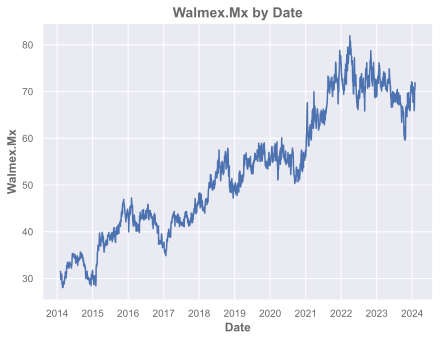

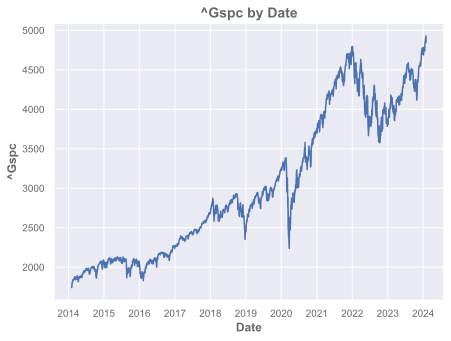

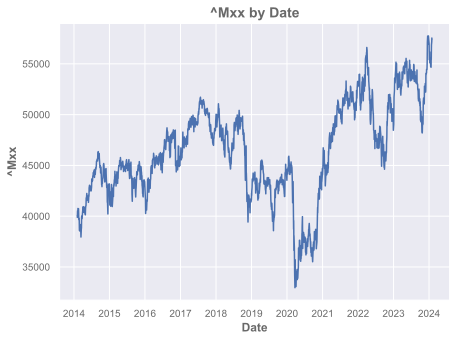

In [60]:
plot_linechart(stocks_df)

The time trends of the sales dataset are shown below:

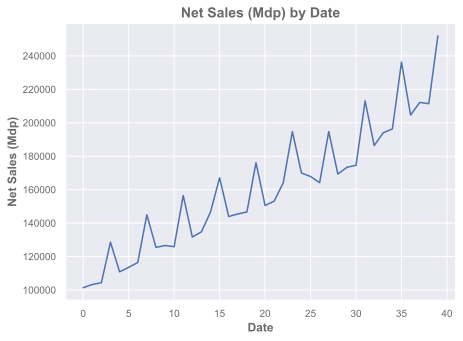

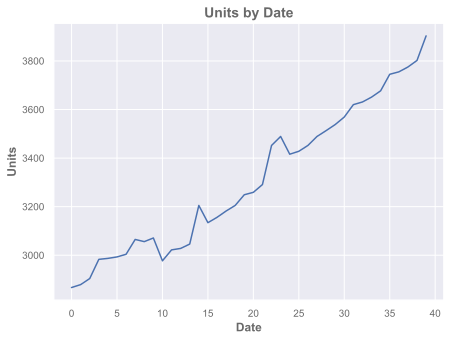

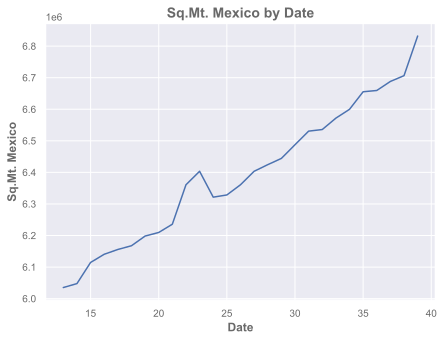

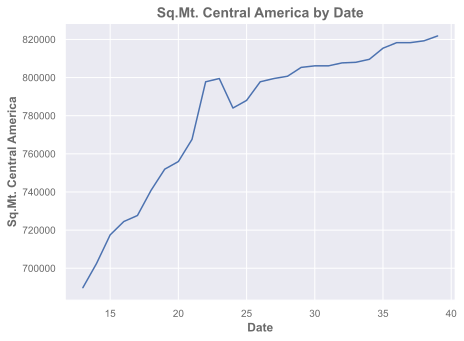

In [62]:
plot_linechart(sales_df.drop(columns=['Year', 'Quarter']))

Moreover, the time trend of the GDP dataset is shown below:

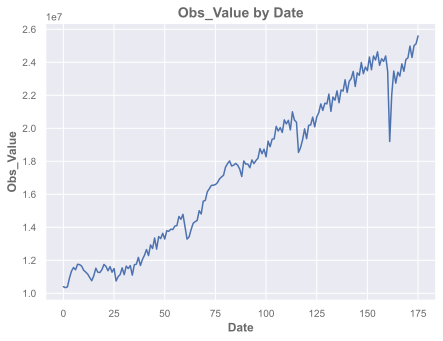

In [64]:
plot_linechart(gdp_df[['OBS_VALUE']].astype(float))

The time trend of the exchange rates dataset is shown below:

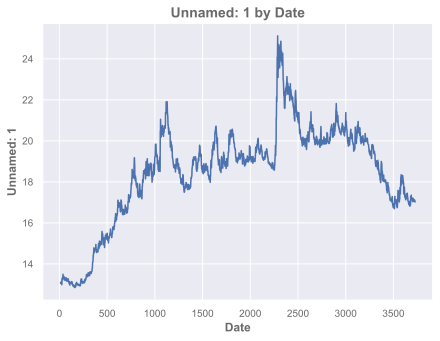

In [66]:
plot_linechart(exchange_rates_df.iloc[11:,1].astype(float).to_frame())

The time trend of the bonds rates dataset is shown below:

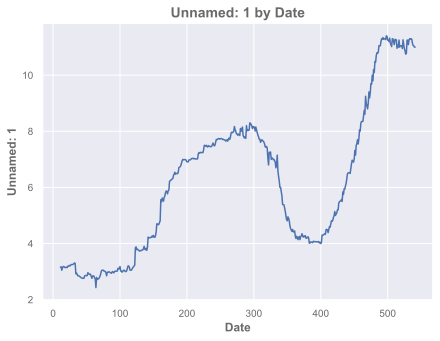

In [68]:
plot_linechart(bonds_rates_df.iloc[11:,1].astype(float).to_frame())

The time trend of the interest rates dataset is shown below:

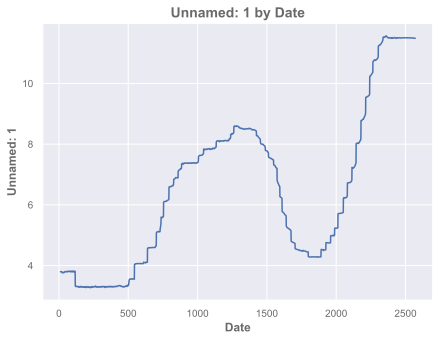

In [70]:
plot_linechart(interest_rates_df.iloc[11:,1].astype(float).to_frame())

#### **Distributions**

The distribution and variables's relationships of the stocks dataset is shown below by a means of a pairplot:

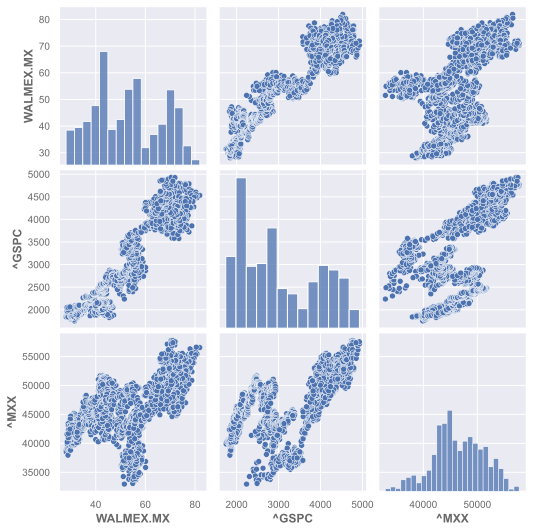

In [61]:
# Exploring distributions and correlations with pairplot
sns.pairplot(stocks_df)

The distribution and variables's relationships of the sales dataset is shown below by a means of a pairplot:

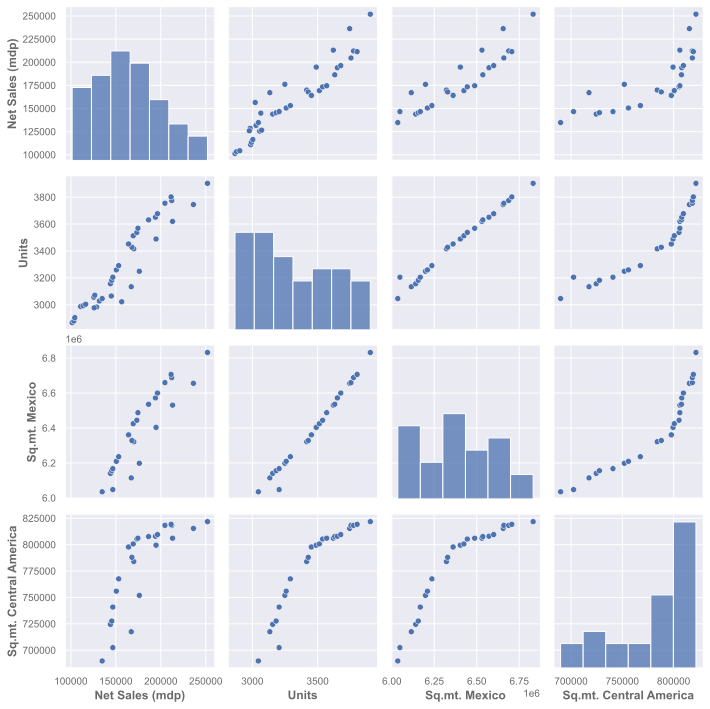

In [63]:
# Exploring distributions and correlations with pairplot
sns.pairplot(sales_df.drop(columns=['Year', 'Quarter']))

The distribution of the GDP dataset is shown below:

<Axes: ylabel='Count'>

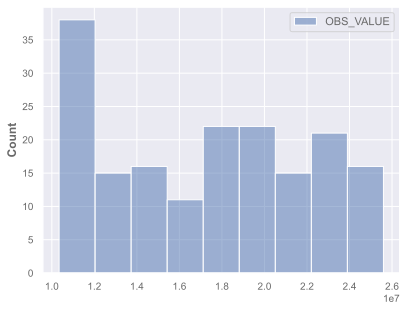

In [65]:
# Exploring distribution with histogram
sns.histplot(gdp_df[['OBS_VALUE']].astype(float))

The distribution of the exchange rates dataset is shown below:

<Axes: ylabel='Count'>

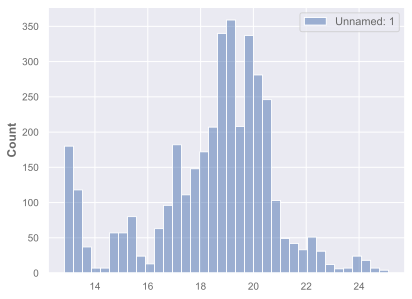

In [67]:
# Exploring distribution with histogram
sns.histplot(exchange_rates_df.iloc[11:,1].astype(float).to_frame())

The distribution of the bonds rates dataset is shown below:

<Axes: ylabel='Count'>

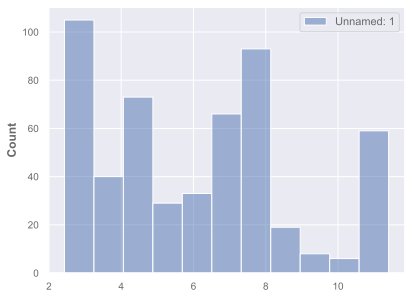

In [69]:
# Exploring distribution with histogram
sns.histplot(bonds_rates_df.iloc[11:,1].astype(float).to_frame())

The distribution of the interest rates dataset is shown below:

<Axes: ylabel='Count'>

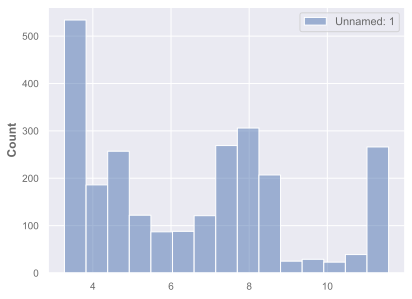

In [71]:
# Exploring distribution with histogram
sns.histplot(interest_rates_df.iloc[11:,1].astype(float).to_frame())

#### **Correlations**

<a class="anchor" id="references"></a>
___
## **8. References**
___


* <a class="anchor" id="nist"></a>**NIST/SEMATECH (2012)**. *e-Handbook of Statistical Methods*. https://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm 
* <a class="anchor" id="rollins"></a> **Rollins, J. B. (2015)**. *Metodología Fundamental para la Ciencia de Datos. Somers: IBM Corporation.* https://www.ibm.com/downloads/cas/WKK9DX51
* <a class="anchor" id="walmex"></a>**Wal-Mart de México S.A.B. de C.V. (2024)**. *Información Financiera Trimestral 4T*. https://files.walmex.mx/upload/files/2023/ES/Trimestral/4T23/WALMEX_4T23_BMV.pdf